## numpy - Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
array1 = np.genfromtxt('Odometer.csv',skip_header=1, delimiter=',')
array1[:5]

array([[37.4, 14.6],
       [44.8, 14.1],
       [45.8, 14. ],
       [30.9, 15.6],
       [31.7, 15.6]])

In [3]:
array1.shape

(100, 2)

In [4]:
x, y = array1[:,0], array1[:,1]
x[:5]

array([37.4, 44.8, 45.8, 30.9, 31.7])

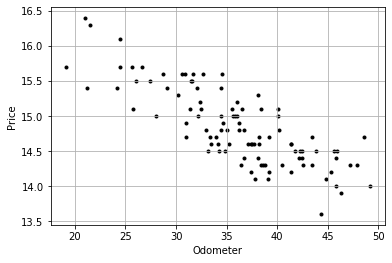

In [5]:
plt.figure()
plt.scatter(x,y,c='k',s=9)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

### Fit regression line with sklearn

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
x.shape

(100,)

In [8]:
x_2d = x.reshape(-1, 1)
x_2d.shape

(100, 1)

In [9]:
m1 = LinearRegression().fit(x_2d,y)

In [10]:
# intercept and slope of regression line

In [11]:
m1.intercept_

17.24872734291551

In [12]:
m1.coef_

array([-0.06686089])

In [13]:
# m1.intercept_ is a float number
# m1.coef_ is an array

R-squared

In [14]:
m1.score(x_2d,y)

0.6482954749384247

Estimate average Price of a car with 40 miles Odometer reading

In [15]:
newval = np.array([[40]])
newval

array([[40]])

In [16]:
newval.shape

(1, 1)

In [17]:
m1.predict(newval)

array([14.57429193])

### regression with numpy

In [18]:
x[:5]

array([37.4, 44.8, 45.8, 30.9, 31.7])

In [19]:
# add column of ones to x

In [20]:
x1 = np.c_[np.ones(100),x]
x1[:5]

array([[ 1. , 37.4],
       [ 1. , 44.8],
       [ 1. , 45.8],
       [ 1. , 30.9],
       [ 1. , 31.7]])

In [21]:
# may use np.append(...,axis = 1) too

In [22]:
# also, use np.r_[] to add rows 

In [23]:
# Use b = inv(x'x) x'y

In [24]:
b1 = np.dot(x1.T,x1)
b1 = np.linalg.inv(b1)
b1

array([[ 3.11063002e-01, -8.36030663e-03],
       [-8.36030663e-03,  2.32159802e-04]])

In [25]:
b2 = np.dot(x1.T,y)
b2

array([ 1484.1 , 53155.93])

In [26]:
coeffs = np.dot(b1,b2)
coeffs

array([17.24872734, -0.06686089])

In [27]:
coeffs.shape

(2,)

In [28]:
# Prediction Yhat = X b

In [29]:
coeffs2 = coeffs.reshape(-1,1)
coeffs2

array([[17.24872734],
       [-0.06686089]])

In [30]:
coeffs2.shape

(2, 1)

In [31]:
# array for a car with Odometer reading 40

In [32]:
newval = np.array([[1,40]])
newval

array([[ 1, 40]])

In [33]:
newval.shape

(1, 2)

In [34]:
np.dot(newval,coeffs2)

array([[14.57429193]])

### scatterplot -using Matplotlib

In [36]:
# predict price of all Odometer values in x
# yhat = m1.predict(x_2d)

In [37]:
yhat = np.dot(x1,coeffs)
yhat[:5]

array([14.74813023, 14.25335968, 14.18649879, 15.18272599, 15.12923728])

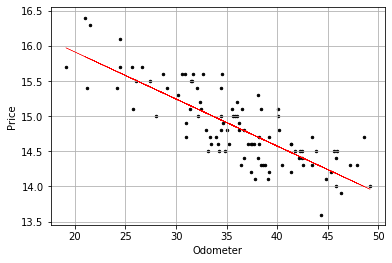

In [45]:
plt.figure()
plt.scatter(x,y,c='k',s=6)
plt.plot(x,yhat,color = 'r',linewidth = 0.4)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()